In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

In [ ]:
print("Train podaci:")
print(train_df.head())

print("\nTest podaci:")
print(test_df.head())

Train podaci:
   feature_0      feature_1  feature_2  feature_3  feature_4      feature_5  \
0  95.896920 -150601.028388   1.038111  16.799569   1.271589  564172.021414   
1  -5.963178  146950.259330   0.397712  -8.795407   0.134486  -64655.915494   
2 -26.919002  -35229.808387   0.801298  -4.423220   0.898506 -596306.335735   
3  36.021504   21677.586991  -0.695408   1.806859   1.175144  623407.348578   
4   6.647411  -61186.810133  -0.392905  -8.103652   0.095550  -85483.961941   

    feature_6  feature_7    feature_8    feature_9  ...  feature_11  \
0  538.183354   8.999096 -2226.590877 -4201.819377  ...  470.722816   
1  128.371372   2.421004 -2248.727425  2894.071700  ... -285.201720   
2  218.064970  -0.893565  4602.237983 -3821.165561  ...  268.626789   
3 -296.386332  -5.788539 -5579.004210  2016.973672  ...  232.157282   
4  142.694005  -1.017173  1250.562066 -2099.988108  ...   25.306706   

   feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  \
0   43.

In [ ]:
print("\nNedostajuće vrijednosti u train skupu:")
print(train_df.isnull().sum())

print("\nNedostajuće vrijednosti u test skupu:")
print(test_df.isnull().sum())


Nedostajuće vrijednosti u train skupu:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
class         0
dtype: int64

Nedostajuće vrijednosti u test skupu:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
dtype: int64


In [ ]:
X_train = train_df.drop(columns=['class'])
y_train = train_df['class']
X_test = test_df.copy()


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_tr, y_tr)

RandomForestClassifier(random_state=42)

In [ ]:
y_val_pred = model.predict(X_val)

In [ ]:
print("\nIzvještaj klasifikacije:")
print(classification_report(y_val, y_val_pred))
print("Točnost na validacijskom skupu:", accuracy_score(y_val, y_val_pred))


Izvještaj klasifikacije:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2788
           1       0.92      0.92      0.92      1407
           2       0.91      0.90      0.90       732
           3       0.96      0.79      0.87       288
           4       0.95      0.98      0.97      4189
           5       0.93      0.87      0.90       286
           6       0.97      0.96      0.96       846
           7       0.90      0.82      0.86       270
           8       0.90      0.96      0.93      1516
           9       0.84      0.80      0.82       990
          10       0.90      0.81      0.85       139
          11       0.92      0.52      0.67        86
          12       0.85      0.84      0.85       463

    accuracy                           0.93     14000
   macro avg       0.91      0.85      0.88     14000
weighted avg       0.93      0.93      0.93     14000

Točnost na validacijskom skupu: 0.9284285714285714


In [ ]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nVažnost značajki:")
print(feature_importance)





Važnost značajki:
       feature  importance
5    feature_5    0.249089
6    feature_6    0.228739
1    feature_1    0.221317
8    feature_8    0.156801
12  feature_12    0.009224
9    feature_9    0.009172
14  feature_14    0.009172
11  feature_11    0.009143
10  feature_10    0.009124
16  feature_16    0.009119
17  feature_17    0.009087
18  feature_18    0.009055
2    feature_2    0.009045
3    feature_3    0.009027
0    feature_0    0.009022
4    feature_4    0.009008
15  feature_15    0.008940
7    feature_7    0.008939
13  feature_13    0.008903
19  feature_19    0.008074


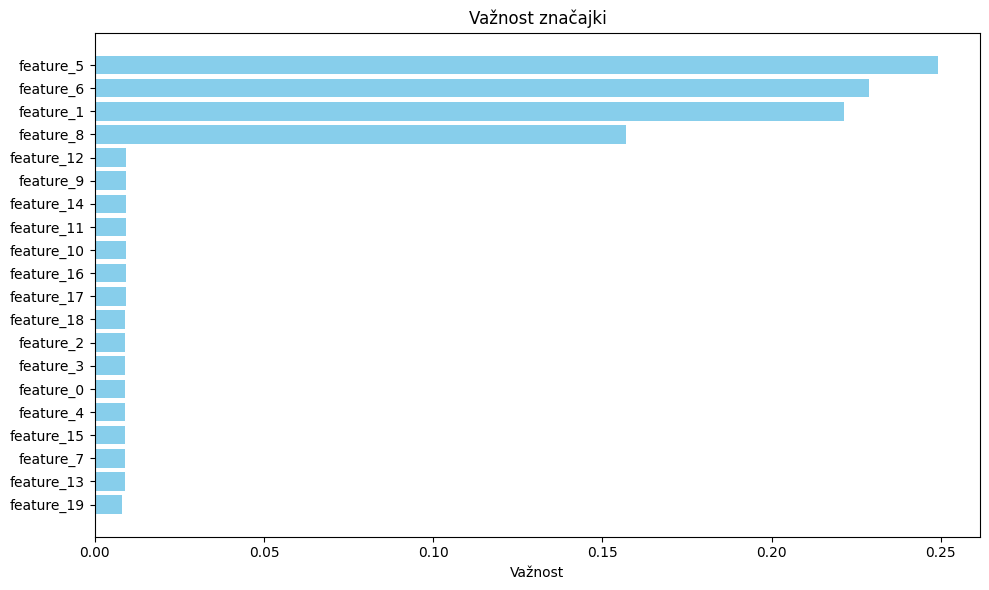

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
plt.title('Važnost značajki')
plt.xlabel('Važnost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
test_preds = model.predict(X_test_scaled)

In [ ]:
submission_df = pd.DataFrame({
    "ID": list(range(len(test_preds))),
    "class": test_preds
})

submission_df.to_csv("submission.csv", index=False)


In [ ]:
print("\nPrvih nekoliko redova predikcija:")
print(submission_df.head())


Prvih nekoliko redova predikcija:
   ID  class
0   0      1
1   1      0
2   2      6
3   3      0
4   4      4
